# import

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import h5py
import sys
import os
import time
import scipy
import scipy.io as scio

from LCLSDataToolsNew.GeneralTools import *
from LCLSDataToolsNew.filterTools import *
from LCLSDataToolsNew.diffSignalTools import *
from LCLSDataToolsNew.plottingTools import *
from LCLSDataToolsNew.binningToolsErr import *
from LCLSDataToolsNew.anisotropyToolsAll import *
from LCLSDataToolsNew.SVDTools import *

from sklearn.linear_model import RANSACRegressor as RSC
from sklearn.linear_model import LinearRegression as LR

from LCLSDataToolsNew.SetUpFns import *
from LCLSDataToolsNew.DiffBinFns import *
from LCLSDataToolsNew.ReduceFns import *

# set up params dictionary

In [2]:
paramDict= {
        'binSetup'  : 'points',
        'binSet2'   : 300,
        'binMethod' : 'ave', 
        'qnorm'     : (3,4), 
        'qrange'    : (.2,4.5),
        'show_filters'  : True, #show filter plots
        'useAzav_std'  : False, 
        'azav_percent_filter' : None, # if nonzero, use azav_std as filter
        'ipm'    : 4, # select ipm to use
        'corr_filter' : True,
        'ipm_filter' : (5,None), # if corr_filter, can set limits for ipm intensity
        'I0_threshold'  : 1,
        'use_TT'   :   True,  #options are True, False, and 'filter'  ('filter is for filter only) 
        'scan_var' : None,
        'x_var'   : None,
        't0_corr' : None,  #false or float offset for time zero
        'enforce_iso': False,
        'NonLin_corr': None, #None, SVD, poly, or SVDbyBin
        'AdjSub'    : 50, #number of adjascent off shots to average and subtract, -1 subtracts all
        'aniso'  : True,
        'shift_n' :0,
        'xstat' : True,
    
    
        }

## can have defaults in config file and update parts of param dict here

# set up variable dictionary

In [3]:
varDict = {
        'ipm4'          : 'ipm4/sum',
        'ipm5'          : 'ipm5/sum',
        'xray_status'   : 'lightStatus/xray',
        'laser_status'  : 'lightStatus/laser',
        'ebeam_hv'      : 'ebeam/photon_energy',
        'scan_vec'      : 'scan/var0',
        'laser_diode'   : '/diodeGon/channels/',
    
        ## tt variables
        'ttCorr'        : 'tt/ttCorr',
        'ttAMPL'        : 'tt/AMPL',
        'ttFWHM'        : 'tt/FLTPOSFWHM',
        'ttFLTPOS'      : 'tt/FLTPOS',
        # 'ttFLTPOS_PS'   : 'tt/FLTPOS_PS', ## in picoseconds
        # 'ttREFAMPL'     : 'tt/REFAMPL',
        'encoder'       : 'enc/lasDelay',
        'lxt'           : 'epics/lxt' , 
        # 'lxt_ttc'       : 'epics/lxt_ttc',
        
        ## scattering variables
        'azav'      : 'epix10k2M/azav_azav',
        'qs'        : 'UserDataCfg/epix10k2M/azav__azav_q',
        'phis'      :  'UserDataCfg/epix10k2M/azav__azav_phiVec',
    
        ## scattering detector error
        #'azav_sqr'     :  'epix10k2M/azav_azav_square',
        # 'pix_per_azav'  :  'UserDataCfg/epix10k2M/azav__azav_norm',
    
        # ## spectroscopy variables
        # 'epix_roi0'        : 'epix_1/ROI_0_area',
        # 'epix_roi0_sum'    : 'epix_1/ROI_0_sum',
        # 'droplet_x'        : 'epix_1/ragged_droplet_photon_j', #nondispersive axis
        # 'droplet_y'        :  'epix_1/ragged_droplet_photon_i', #energy dispersive
        # 'epix_roi0_limits' : 'UserDataCfg/epix_1/ROI_0__ROI_0_ROI',

        }

# Test

scan variable is  newdelay
finished loading h5
calculated I0
setupFilters - done!
making correlation filter
correlation equation = 8.842417e-03 x +-6.714783e+01
fraction of data kept 3.222860e-01
ebeam filter: fraction_kept  0.990009324630345  lower  9881.575374868054  upper  9909.34886497906
TTFWHM: fraction_kept  0.9903299203640501  lower  70.21400984573714  upper  129.63596038374004
TTPOS: fraction_kept  0.9908970225677982  lower  342.8963766513458  upper  704.4884192739146
t=(encoder + tt/ttCorr)*1e-12


/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/DiffBinFns.py:90: RuntimeWarning: Mean of empty slice
  darkMean = np.nanmean(dark,0)


x-ray off subtraction done!
applying energy correction
nonlinear correction - done!
normalize data


/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/diffSignalTools.py:11: RuntimeWarning: Mean of empty slice
  az_av=np.nanmean(dat,1) #single azimuthal averages
/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/diffSignalTools.py:13: RuntimeWarning: Mean of empty slice
  norm_factor=np.nanmean(az_av[:,q_ind],1) #mean of points between q limits for each shot
/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/DiffBinFns.py:289: RuntimeWarning: Mean of empty slice
  cake=np.nanmean(cspad_azav[early_x,:,:]/normal_factor[early_x,None,None],0) #normalize by norm
/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/DiffBinFns.py:316: RuntimeWarning: Mean of empty slice
  totaloff=np.nanmax(np.nanmean(cake,0))


normalize data done!
starting difference signal
Difference Signal Done!
Starting binning
bin by points, 300 per bin
0 Done
1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done
10 Done
binning - done!
shift is 2 degrees
17
16saved output to  /cds/home/s/slraj/code/ScatteringCode/xcsly3420_Run0120_out.npy


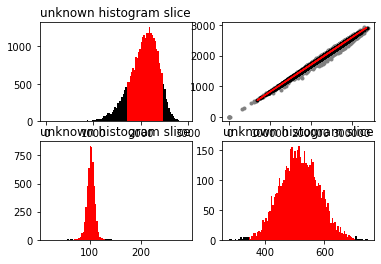

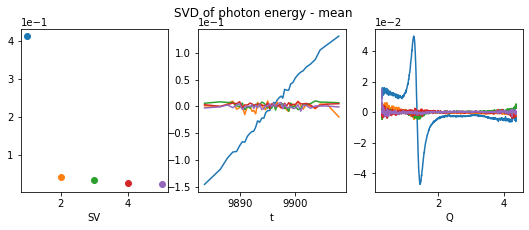

In [4]:
smalldata_folder='/reg/d/psdm/xcs/xcsly3420/hdf5/smalldata/smdffb/'
exper = 'xcsly3420'
runs=[120]
ReduceData(smalldata_folder,exper,runs,'/cds/home/s/slraj/code/ScatteringCode/',paramDict,varDict)